In [ ]:
#imports
import pandas as pd
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Steel_industry_data.csv')
df.head(8)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load


In [ ]:
df.shape

(35040, 11)

In [ ]:
df.columns

Index(['date', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type'],
      dtype='object')

In [ ]:
df.rename(columns= {'Lagging_Current_Reactive.Power_kVarh' : 'Lagging_Current_Reactive_Power_kVarh', 'CO2(tCO2)' : 'CO2'}, inplace= True)

In [ ]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2                                   35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [ ]:
df.corr()

<ipython-input-62-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
Usage_kWh,1.000000,0.896150,-0.324922,0.988180,0.385960,0.353566,0.234610
Lagging_Current_Reactive_Power_kVarh,0.896150,1.000000,-0.405142,0.886948,0.144534,0.407716,0.082662
Leading_Current_Reactive_Power_kVarh,-0.324922,-0.405142,1.000000,-0.332777,0.526770,-0.944039,0.371605
CO2,0.988180,0.886948,-0.332777,1.000000,0.379605,0.360019,0.231726
Lagging_Current_Power_Factor,0.385960,0.144534,0.526770,0.379605,1.000000,-0.519967,0.565270
Leading_Current_Power_Factor,0.353566,0.407716,-0.944039,0.360019,-0.519967,1.000000,-0.360563
NSM,0.234610,0.082662,0.371605,0.231726,0.565270,-0.360563,1.000000


## EDA

<ipython-input-63-9098ae8a9a4d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')


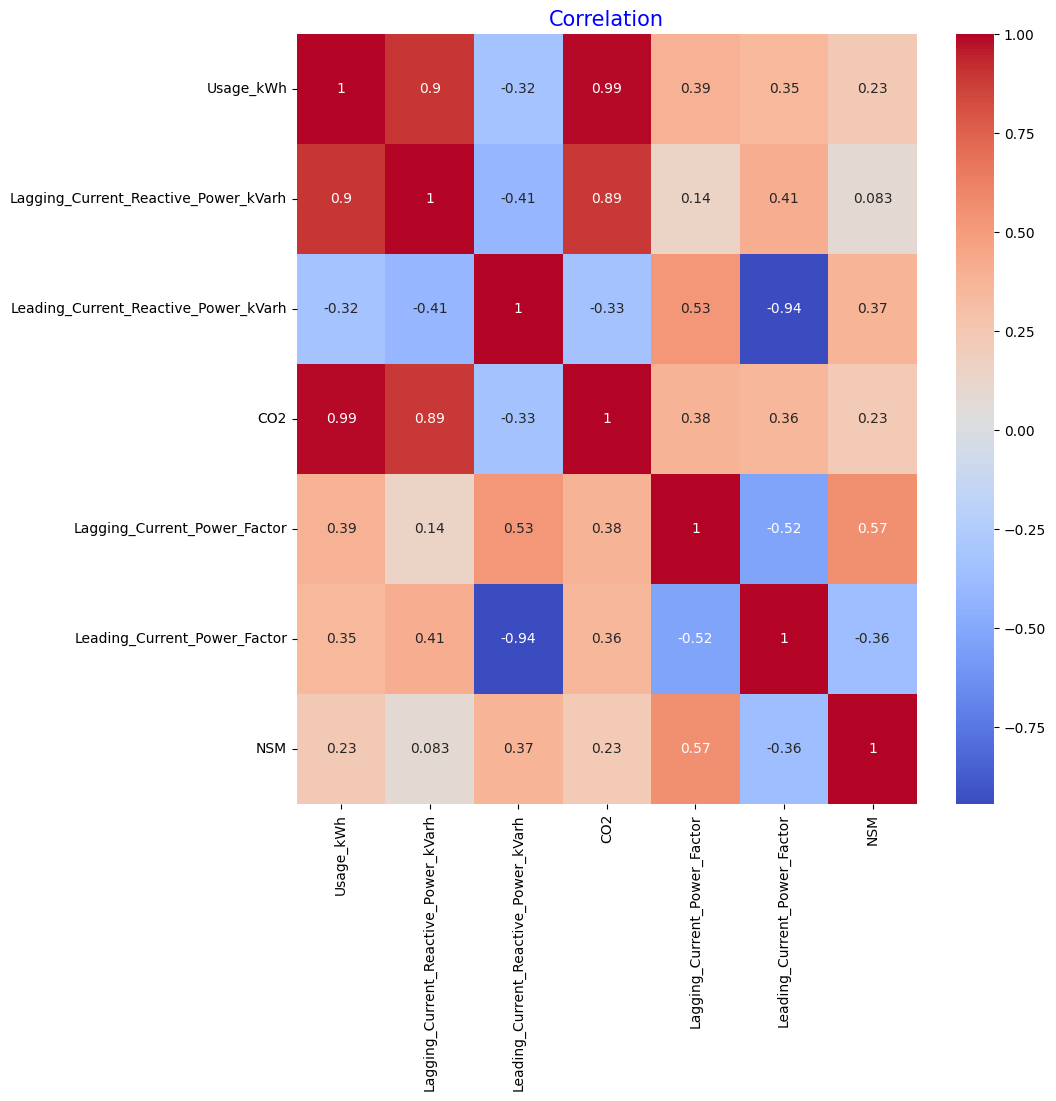

In [ ]:
# correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')
plt.title('Correlation', fontsize= 15, color= 'b', loc= 'center')
plt.show()

In [ ]:
most_energy_cons= pd.pivot_table(df, index= 'date', values='Usage_kWh', aggfunc={'Usage_kWh' : np.max})
most_energy_cons.head(8)

,Usage_kWh
date,
01/01/2018 00:00,3.42
01/01/2018 00:15,3.17
01/01/2018 00:30,4.00
01/01/2018 00:45,3.24
01/01/2018 01:00,3.31
01/01/2018 01:15,3.82
01/01/2018 01:30,3.28
01/01/2018 01:45,3.60


Text(0, 0.5, 'Energy Consumed')

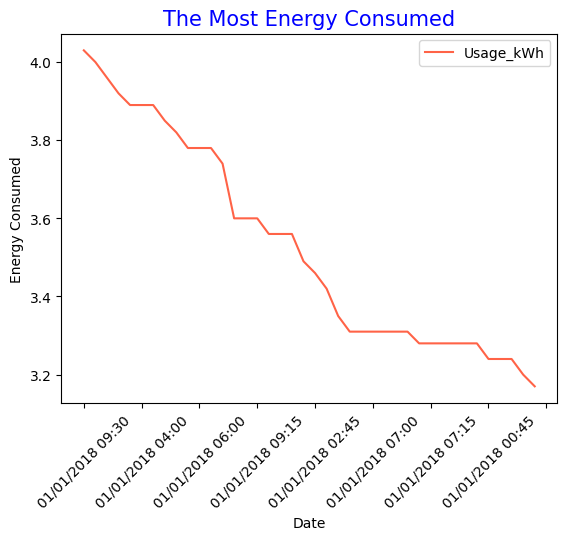

In [ ]:
#plot for most energy consumed
chart= most_energy_cons[:40].sort_values(by= 'Usage_kWh', ascending= False).plot(kind= 'line', color= 'tomato')
chart.set_xticklabels(chart.get_xticklabels(), rotation= 45)
plt.title('The Most Energy Consumed', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Date')
plt.ylabel('Energy Consumed')

Text(0, 0.5, 'Count')

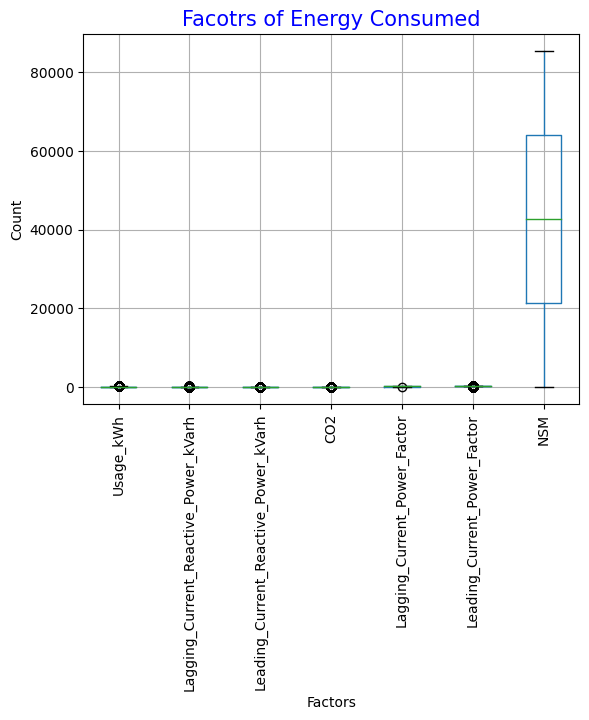

In [ ]:
# plot for energy consumed by the factors
chart = df.boxplot(column= ['Usage_kWh', 'Lagging_Current_Reactive_Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM'])

chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title('Facotrs of Energy Consumed', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Factors')
plt.ylabel('Count')

In [ ]:
pd.pivot_table(df, index= ['Load_Type', 'Day_of_week', 'WeekStatus'], values= ['NSM', 'Usage_kWh'], aggfunc= {'NSM' : np.mean, 'Usage_kWh' : np.mean })

NSM  Usage_kWh
Load_Type    Day_of_week WeekStatus                         
Light_Load   Friday      Weekday     23206.204380  11.361442
             Monday      Weekday     24026.223776   8.805459
             Saturday    Weekend     31381.843575   7.072210
             Sunday      Weekend     39144.653465   4.171106
             Thursday    Weekday     23206.204380  11.803964
             Tuesday     Weekday     24074.199288  10.510040
             Wednesday   Weekday     24074.199288  10.780560
Maximum_Load Friday      Weekday     53106.000000  61.043700
             Monday      Weekday     53106.000000  66.278233
             Saturday    Weekend     52492.105263  41.529605
             Sunday      Weekend     52826.470588  29.195662
             Thursday    Weekday     53106.000000  64.522758
             Tuesday     Weekday     53176.530612  66.023359
             Wednesday   Weekday     53176.530612  62.358359
Medium_Load  Friday      Weekday     61758.000000  42.220494
             Monday      Weekday     61758.000000  43.097231
             Saturday    Weekend     62218.421053  17.547648
             Sunday      Weekend     61967.647059  16.368934
             Thursday    Weekday     61758.000000  44.986200
             Tuesday     Weekday     61705.102041  45.020797
             Wednesday   Weekday     61705.102041  40.462379

Text(0, 0.5, 'Energy Consumed')

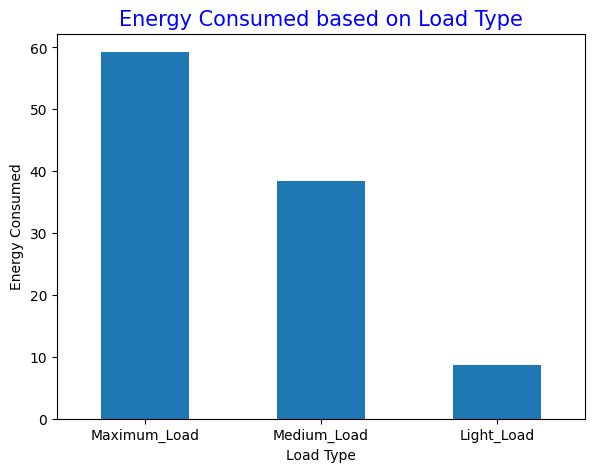

In [ ]:
# plot for energy consumed on load type
plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
chart = df.groupby('Load_Type')['Usage_kWh'].mean().sort_values(ascending= False).plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('Energy Consumed based on Load Type', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Load Type')
plt.ylabel('Energy Consumed')

Text(0, 0.5, 'Np.of second midnight')

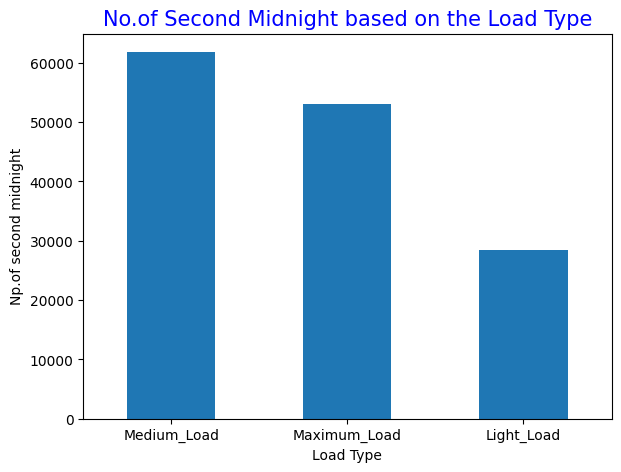

In [ ]:
#plot for NSM on load type
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
chart= df.groupby('Load_Type')['NSM'].mean().sort_values(ascending= False).plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0)
plt.title('No.of Second Midnight based on the Load Type', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Load Type')
plt.ylabel('Np.of second midnight')

<Figure size 1500x500 with 0 Axes>

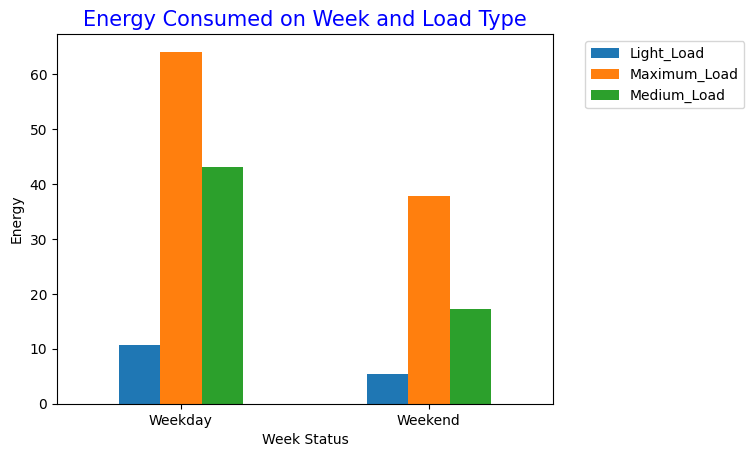

In [ ]:
#plot for week and load type energy consumed
plt.figure(figsize=(15,5))
chart = df.groupby(['WeekStatus', 'Load_Type'])['Usage_kWh'].mean().unstack().plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation= 0)
plt.title('Energy Consumed on Week and Load Type', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Week Status')
plt.ylabel('Energy')
plt.legend(bbox_to_anchor= (1.4, 1))

<Figure size 1500x800 with 0 Axes>

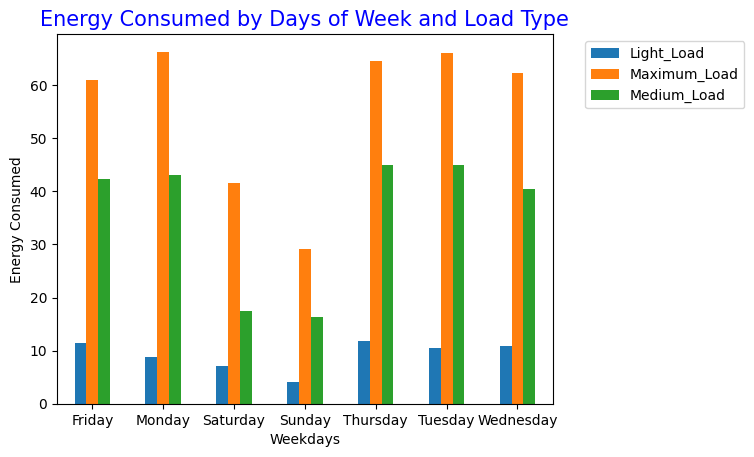

In [ ]:
#plot for days of week
plt.figure(figsize=(15,8))
chart = df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 0 )
plt.title('Energy Consumed by Days of Week and Load Type', fontsize= 15, color= 'b')
plt.xlabel('Weekdays')
plt.ylabel('Energy Consumed')
plt.legend(bbox_to_anchor= (1.4,1))

<Figure size 1500x800 with 0 Axes>

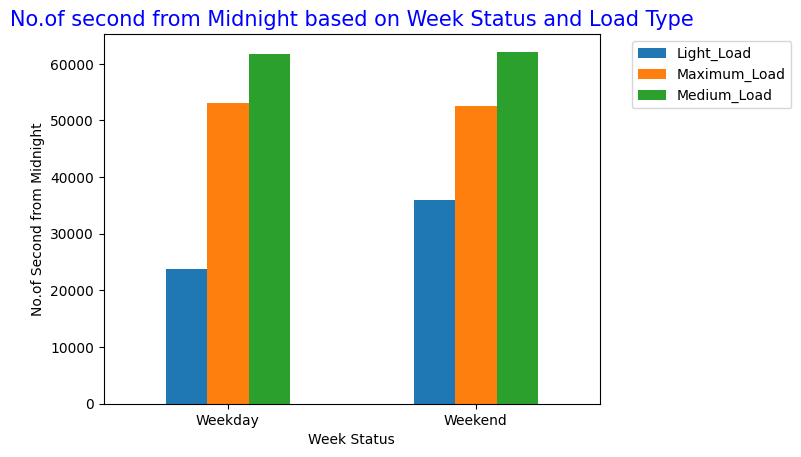

In [ ]:
#plot for week status
plt.figure(figsize= (15,8))
chart = df.groupby(['WeekStatus', 'Load_Type'])['NSM'].mean().unstack().plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation= 0)
plt.title('No.of second from Midnight based on Week Status and Load Type', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Week Status')
plt.ylabel('No.of Second from Midnight')
plt.legend(bbox_to_anchor= (1.4,1))

<Figure size 1500x800 with 0 Axes>

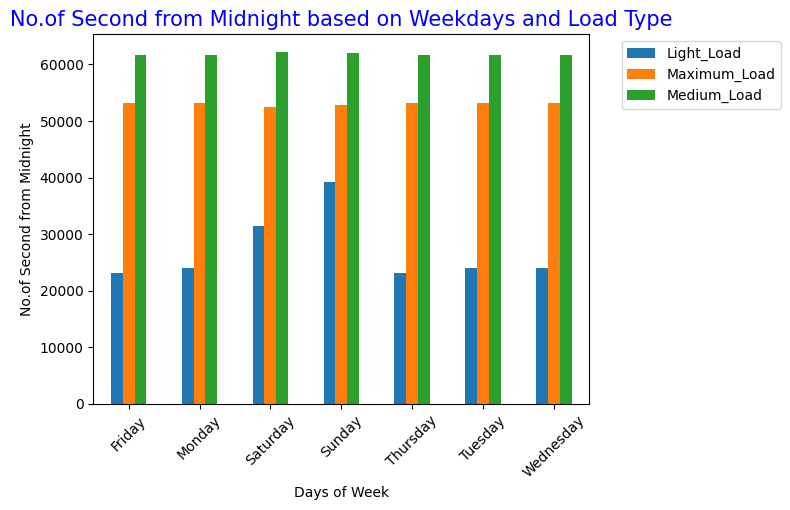

In [ ]:
#plot for NSM on weekdays
plt.figure(figsize= (15,8))
chart= df.groupby(['Day_of_week','Load_Type'])['NSM'].mean().unstack().plot(kind= 'bar')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('No.of Second from Midnight based on Weekdays and Load Type', fontsize= 15, color= 'b', loc= 'center')
plt.xlabel('Days of Week')
plt.ylabel('No.of Second from Midnight')
plt.legend(bbox_to_anchor= (1.4,1))

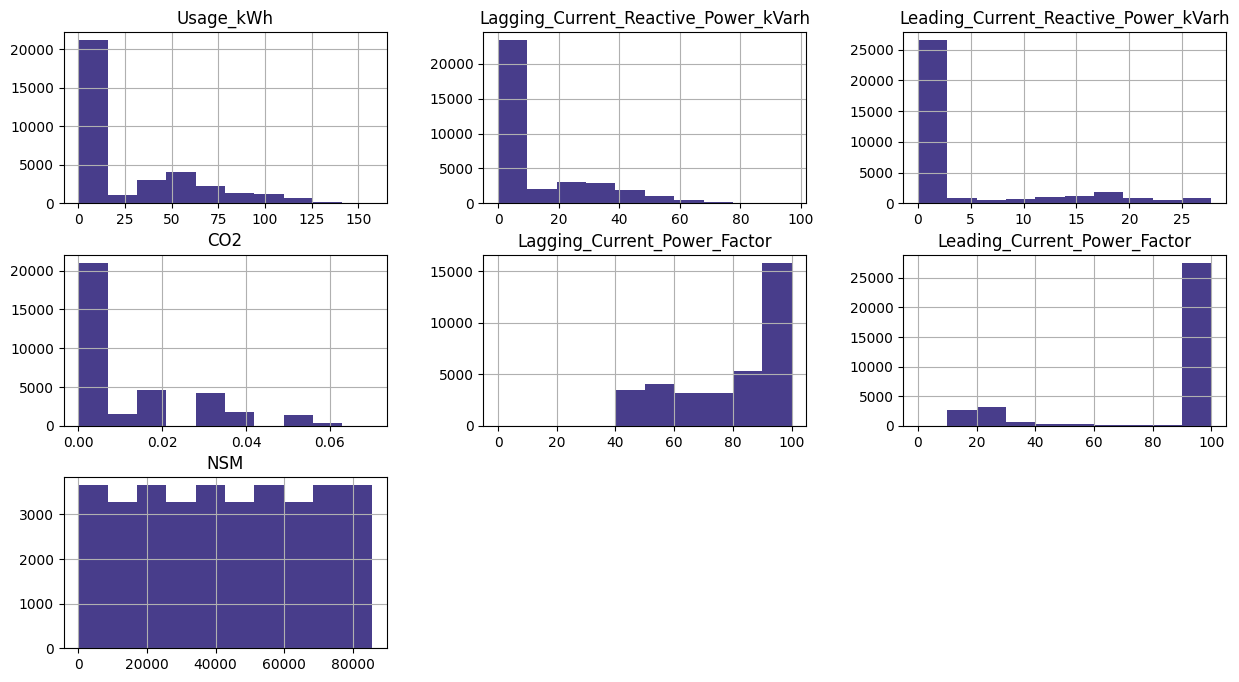

In [ ]:
# e valuating distributions of the features
df.hist(figsize= (15,8), color = "#483D8B")
plt.show()

## **MODEL**

In [ ]:
df= df.set_index('date')

df = pd.get_dummies(df, drop_first= True)
df.head()

,Usage_kWh,Lagging_Current_Reactive_Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus_Weekend,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,
01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,0,0,0,0,0
01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,0,0,0,0,0
01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,0,0,0,0,0
01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,0,0,0,0,0
01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,0,0,0,0,0


In [ ]:
#split data
X = df.drop('Usage_kWh', axis= 1)
y = df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24528, 15)
(10512, 15)
(24528,)
(10512,)


In [ ]:
#check models
lr = LinearRegression()
%time lr.fit(X_train, y_train)
lr.score(X_test, y_test)

CPU times: user 16.1 ms, sys: 18 ms, total: 34 ms
Wall time: 57.4 ms


0.9841681626773733

In [ ]:
ridge = Ridge(alpha= 0.5)
%time ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

CPU times: user 9.23 ms, sys: 3.97 ms, total: 13.2 ms
Wall time: 17.8 ms


0.968361386152787

In [ ]:
lasso = Lasso(alpha= 0.5)
%time lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

CPU times: user 56 ms, sys: 835 µs, total: 56.8 ms
Wall time: 34.3 ms


0.9098749972992153

Linear Regression Model is sutiable for predict energy consumed by industry with accuracy score of 98%



In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[  3.09659745  70.15826234 124.42399214 ...   2.22293667   1.54271064
   3.94845762]


In [ ]:
#check metrics
print('Mean Squared Error : ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error : ', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error : ', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error :  17.769389051354427
Mean Absolute Error :  2.5519176087424835
Root Mean Squared Error :  4.215375315598177


Text(0, 0.5, 'Predicted')

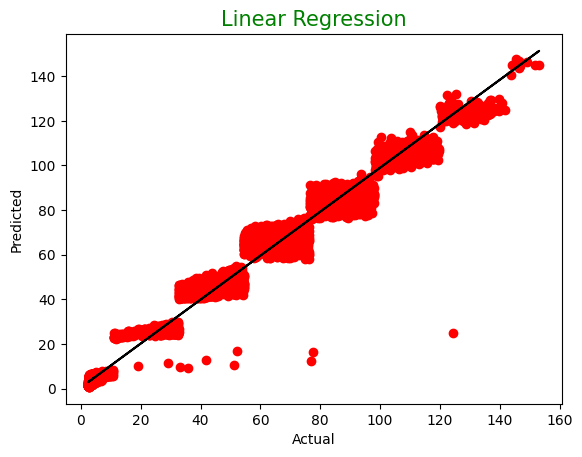

In [ ]:
#visualize model
x = y_test
y = y_pred

plt.title('Linear Regression', fontsize= 15, color= 'g', loc= 'center')
plt.plot(x,y, 'o', color= 'r')

m,b = np.polyfit(x,y,1)
plt.plot(x, m*x + b, color = 'black')
plt.xlabel('Actual')
plt.ylabel('Predicted')